# 朴素贝叶斯

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as CM

In [3]:
data = pd.read_csv('D2.data',sep=',')
data.head() #viewing top 5 rows of dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
data.shape

(149, 5)

In [5]:
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


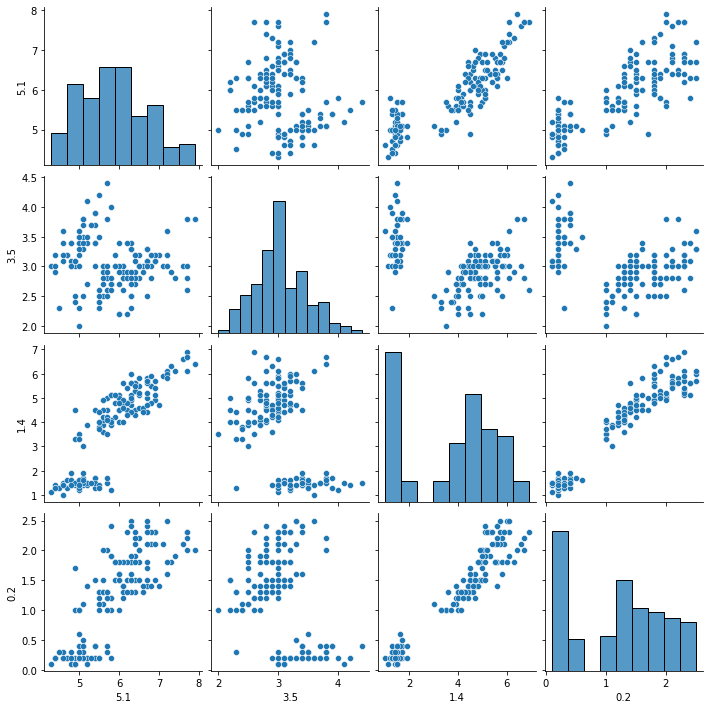

In [7]:
#Check correleation between the variables using Seaborn's pairplot. 
sns.pairplot(data)

In [8]:
data.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Train and Test split

x=data.iloc[:,0:4].values
y=data.iloc[:,4].values
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)



['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [10]:
#view final data
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [12]:
print(x)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

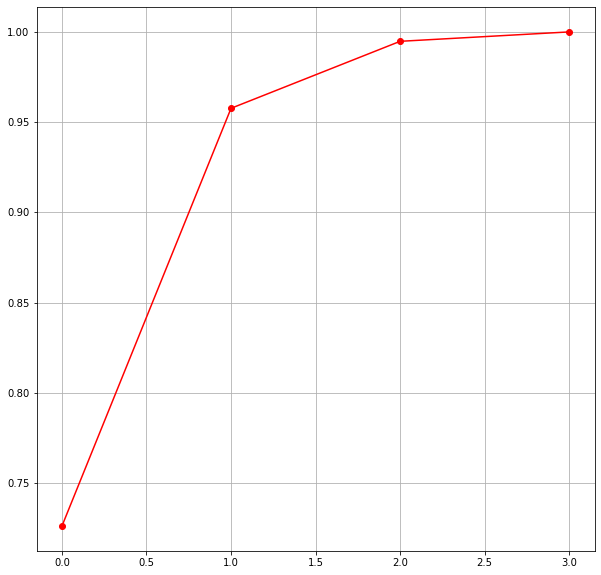

In [14]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(119, 4)
(119,)
(30, 4)
(30,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [17]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]
90.0


In [18]:
print(dt_predict)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [20]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]
90.0


['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']
朴素贝叶斯混淆矩阵：
 [[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


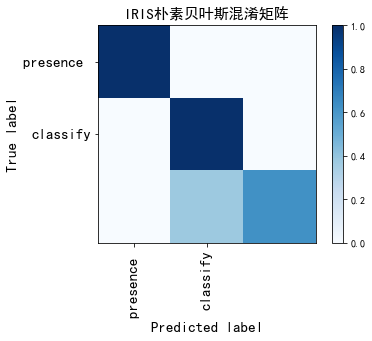

micro: 0.9
macro: 0.875
Predict               Iris-setosa           Iris-versicolor       Iris-virginica        
Actual
Iris-setosa           12                    0                     0                     

Iris-versicolor       0                     10                    0                     

Iris-virginica        0                     3                     5                     





Overall Statistics : 

95% CI                                                            (0.79265,1.00735)
ACC Macro                                                         0.93333
AUNP                                                              0.925
AUNU                                                              0.9125
Bennett S                                                         0.85
CBA                                                               0.79808
CSI                                                               0.79808
Chi-Squared                                                  

In [30]:
import math
from pycm import *


class NaiveBayes():
    """The Gaussian Naive Bayes classifier. """
    def fit(self, X, y):
        self.X, self.y = X, y
        self.classes = np.unique(y)
        self.parameters = []
        # Calculate the mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            # Only select the rows where the label equals the given class
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            # Add the mean and variance for each feature (column)
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, x):
        """ Gaussian likelihood of the data x given mean and var """
        eps = 1e-4 # Added in denominator to prevent division by zero
        coeff = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, c):
        """ Calculate the prior of class c
        (samples where class == c / total number of samples)"""
        frequency = np.mean(self.y == c)
        return frequency

    def _classify(self, sample):
        """ Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
            or Posterior = Likelihood * Prior / Scaling Factor
        P(Y|X) - The posterior is the probability that sample x is of class y given the
                 feature values of x being distributed according to distribution of y and the prior.
        P(X|Y) - Likelihood of data X given class distribution Y.
                 Gaussian distribution (given by _calculate_likelihood)
        P(Y)   - Prior (given by _calculate_prior)
        P(X)   - Scales the posterior to make it a proper probability distribution.
                 This term is ignored in this implementation since it doesn't affect
                 which class distribution the sample is most likely to belong to.
        Classifies the sample as the class that results in the largest P(Y|X) (posterior)
        """
        posteriors = []
        # Go through list of classes
        for i, c in enumerate(self.classes):
            # Initialize posterior as prior
            posterior = self._calculate_prior(c)
            # Naive assumption (independence):
            # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
            # Posterior is product of prior and likelihoods (ignoring scaling factor)
            for feature_value, params in zip(sample, self.parameters[i]):
                # Likelihood of feature value given distribution of feature values given y
                likelihood = self._calculate_likelihood(params["mean"], params["var"], feature_value)
                posterior *= likelihood
            posteriors.append(posterior)
        # Return the class with the largest posterior probability
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        """ Predict the class labels of the samples in X """
        y_pred = [self._classify(sample) for sample in X]
        return y_pred

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
import matplotlib.pyplot as plt
    
    
    
# 定义绘制混淆矩阵
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest',cmap="Blues")    # 在特定的窗口上显示图像
    plt.title(title,fontsize = 15)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label',fontsize = 15) 
    plt.tick_params(labelsize=15)
    plt.xlabel('Predicted label',fontsize = 15)
    
    
def main():
    clf = NaiveBayes()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(y_test)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    c_matrix_bys = confusion_matrix(y_test, y_pred)
    print("朴素贝叶斯混淆矩阵：\n",c_matrix_bys)
    plot_confusion_matrix(c_matrix_bys, ['presence ','classify'], "IRIS朴素贝叶斯混淆矩阵")
    plt.show()
    from sklearn.metrics import recall_score
    micro = recall_score(y_test,y_pred,average = 'micro')
    print("micro:",micro)
    from sklearn.metrics import recall_score
    macro = recall_score(y_test,y_pred,average = 'macro')
    print("macro:",macro)
    

    cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
    print(cm)

if __name__ == "__main__":
    main()
    

In [ ]:
data = [acc, rec, pre, f1]
labels = ['Accary','Recall', 'Precision', 'f1-score']

plt.bar(range(len(data)), data)
plt.show()


In [ ]:
data = [acc, rec, pre, f1]
labels = ['Accary','Recall', 'Precision', 'f1-score']

plt.plot(labels, data)
plt.show()

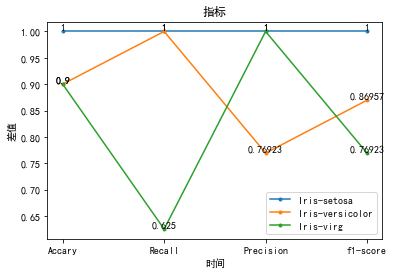

In [35]:
import matplotlib.pyplot as plt

x = ['Accary','Recall', 'Precision', 'f1-score']
y1 = [1, 1, 1, 1]
y2 = [0.9, 1, 0.76923, 0.86957]
y3 = [0.9, 0.625, 1, 0.76923]
plt.title('指标')  # 折线图标题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
plt.xlabel('时间')  # x轴标题
plt.ylabel('差值')  # y轴标题
plt.plot(x, y1, marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
plt.plot(x, y2, marker='o', markersize=3)
plt.plot(x, y3, marker='o', markersize=3)

for a, b in zip(x, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  # 设置数据标签位置及大小
for a, b in zip(x, y2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
for a, b in zip(x, y3):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

plt.legend(['Iris-setosa','Iris-versicolor','Iris-virg'])
